In [2]:
from navground import sim
from navground.sim.notebook import display_in_notebook

# Humans and wheelchairs

You can switch from the thymios little robots to humans and wheelchairs. If you provide the ``type``, the agents will be drawn accordingly.

For humans, you can start from this config:

```yaml
type: human
radius: 0.25
kinematics:
  type: Ahead
  max_speed: 1.5
  max_angular_speed: 3.0
```

For wheelchairs, you can start from this config (taken from the wheelchair website: https://www.accessiblemadrid.com/en/accesorios/otto-bock-c1000-ds)

```yaml
type: wheelchair
radius: 0.4
kinematics:
  type: 2WDiff
  wheel_axis: 0.6
  max_speed: 1.66
```

Note that the relevant shape for all types of navground agents is a *disc*: drawing uses specific shapes that have no impact on computations (neither control nor collisions).

For examples, let's add a wheelchair and a human, one in front of each other. The dotted circle is the effective shape used by navground.

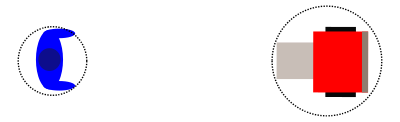

In [3]:
world = sim.load_world("""
agents:
  - type: human
    radius: 0.25
    color: blue
    kinematics:
      type: Ahead
      max_speed: 1.5
      max_angular_speed: 3.0
  - type: wheelchair
    color: red
    radius: 0.4
    kinematics:
      type: 2WDiff
      wheel_axis: 0.6
      max_speed: 1.66
    position: [2, 0]
    orientation: 3.14
""")

display_in_notebook(world, width=400, display_shape=True)

# Enviroment size

You can change the size of the various scenarios.

Let's say we want a "realistic" corridor of width 1.5 meters

In [9]:
scenario = sim.load_scenario("""
type: Corridor
length: 10
width: 1.5
groups:
  - number: 1
    type: human
    radius: 0.25
    color: blue
    kinematics:
      type: Ahead
      max_speed: 1.5
      max_angular_speed: 3.0
  - number: 2
    type: wheelchair
    color: red
    radius: 0.4
    kinematics:
      type: 2WDiff
      wheel_axis: 0.6
      max_speed: 1.2
""")

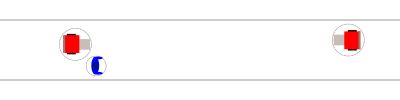

In [10]:
world = sim.World()
scenario.init_world(world, seed=5)
display_in_notebook(world, width=400, display_shape=True, relative_margin=0)

<div class="alert alert-block alert-info">
⚠️ The navigation behaviors in navground don't work well when there is not enough free space around the agents. So, if you add agents and reduce the width of the corridor, they will end up in a deadlock. This is something we are working on but do not rely on our progresses as, in general, they require planning/explicit coordination, or more generally algorithms that are smarter than just obstacle avoidance.
</div>

# Variability

In general, humans move at the different speeds and have the different sizes.
You can generate worlds using random distributions.

Let's say we want the human radius to be uniformly distributed in [0.15, 0.3] and desired speed to be uniformly distributed in [0.7, 1.2].

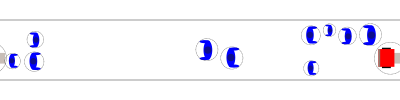

In [6]:
scenario = sim.load_scenario("""
type: Corridor
length: 10
width: 1.5
groups:
  - number: 10
    type: human
    radius:
      sampler: uniform
      from: 0.15
      to: 0.3
    color: blue
    kinematics:
      type: Ahead
      max_speed: 1.5
      max_angular_speed: 3.0
    behavior:
      optimal_speed: 
        sampler: uniform
        from: 0.7
        to: 1.2
    
  - number: 1
    type: wheelchair
    color: red
    radius: 0.4
    kinematics:
      type: 2WDiff
      wheel_axis: 0.6
      max_speed: 1.2
    position: [2, 0]
    orientation: 3.14
""")

world = sim.World()
scenario.init_world(world, seed=0)
display_in_notebook(world, width=400, display_shape=True, relative_margin=0)

<div class="alert alert-block alert-info">
⚠️ Adding a large enough variability (in speed) will probabily change significantly the results you have obtained, as it will decrease order
</div>

# Other Observations

## HRVO and walls

<div class="alert alert-block alert-info">
⚠️ HRVO does not consider walls.  Using it in "Corridor" will produce artifacts, as the agents will keep colliding with the walls.
</div>

## Cross vs Corridor

All being equal, "Cross" is a better scenario to demonstrate things. If you want a more continuos variant, you can try "CrossTorus". As noted, navigating well a crowded corridor would require more sophisticated algorithms than the one currently in navground.